# Halpha Catalog Paper

* made a copy of Halpha-catalog-paper because that used v1 tables
* this notebook will use the v2 tables

In [9]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
import sys
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

Running on Rose's computer


In [13]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v2/'

In [14]:

plotdir = '/home/rfinn/research/Virgo/plots/halpha/'

### Read in tables

In [5]:
%run ~/github/Virgo/programs/readtablesv2.py

/home/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:147: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:147: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:148: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:148: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:150: RuntimeWarning: invalid value encountered in log10
  const =

In [22]:
len(v.ha)

6780

In [23]:
sum(v.main['HAobsflag'])

665

## Halpha Statistics

* update 2021-03-25 : after including Feb and May/June INT data, and NGC pointings from Becky
* update on 2023-05-18 - this is overwhelming...

In [24]:
print('number observed in Halpha = ',sum(v.main['HAobsflag']))
print('number with Halpha SNR > 1 = ',sum(v.main['HAflag']))
print('number of CO sources observed in Halpha = ',sum(v.main['HAobsflag'] & v.main['COflag']))

number observed in Halpha =  665
number with Halpha SNR > 1 =  153
number of CO sources observed in Halpha =  243


# catalog statistics #

In [25]:
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = {:.3f}'.format(sum(v.main['HLflag'])/len(v.main)))

number with HL data =  6622
fraction with HL data = 0.977


In [26]:
radec = (v.main['RA'] > 192.) & (v.main['RA'] < 209) & (v.main['DEC']> 0.) & (v.main['DEC'] < 50.) 
radec_flag = radec & (v.main['DEC'] >(2*(v.main['RA'] - 205.) + 20) ) & (v.main['DEC'] < (2*(v.main['RA'] - 205.) + 55))
filament = radec_flag & (v.main['vr'] >2000.) & (v.main['vr'] < 3238.)

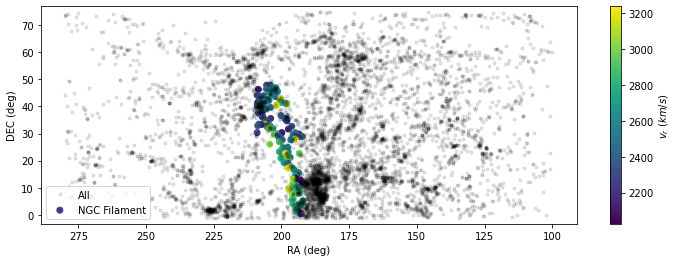

In [27]:
plt.figure(figsize=(12,4))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='All')
plt.scatter(v.main['RA'][filament],v.main['DEC'][filament],c=v.main['vr'][filament],label='NGC Filament')
plt.gca().invert_xaxis()
plt.legend()
cb = plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.axis('equal')
plt.savefig(plotdir+'vf_ngcfilament.png')

# Number of NGC Galaxies with Halpha Data#

In [28]:
ngchaflag = (v.ha['HAflag'] & filament)
print(sum(ngchaflag))

27


In [29]:
# number of CO galaxies with Halpha
nCO = sum(filament & v.main['COflag'])
nCO_ha = sum(ngchaflag & v.main['COflag'])
print('number of galaxies in the filament = ',sum(filament))
print('number of CO galaxies in the filament = ',nCO)
print('number of CO galaxies w/ha in the filament = ',nCO_ha)
print('percent of CO sources w/ha = {:.1f}'.format(nCO_ha/nCO*100))

number of galaxies in the filament =  258
number of CO galaxies in the filament =  47
number of CO galaxies w/ha in the filament =  21
percent of CO sources w/ha = 44.7


In [32]:
v.ha.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'NEDname',
 'prefix',
 'HAflag',
 'REDSHIFT',
 'ZDIST',
 'GAL_RA',
 'GAL_DEC',
 'ELLIP_RA',
 'ELLIP_DEC',
 'FILT_COR',
 'R_FWHM',
 'H_FWHM',
 'POINTING',
 'BBOX',
 'FILTER_RATIO',
 'GAL_XC',
 'GAL_XC_ERR',
 'GAL_YC',
 'GAL_YC_ERR',
 'GAL_MAG',
 'GAL_MAG_ERR',
 'GAL_RE',
 'GAL_RE_ERR',
 'GAL_N',
 'GAL_N_ERR',
 'GAL_BA',
 'GAL_BA_ERR',
 'GAL_PA',
 'GAL_PA_ERR',
 'GAL_SKY',
 'GAL_CHISQ',
 'GAL_SERSASYM',
 'GAL_SERSASYM_ERR',
 'GAL_SERSASYM_ERROR',
 'GAL_SERSASYM_CHISQ',
 'GAL_SERSASYM_RA',
 'GAL_SERSASYM_DEC',
 'ELLIP_XCENTROID',
 'ELLIP_YCENTROID',
 'ELLIP_EPS',
 'ELLIP_THETA',
 'ELLIP_GINI',
 'ELLIP_GINI2',
 'ELLIP_AREA',
 'ELLIP_SUM',
 'ELLIP_SUM_MAG',
 'ELLIP_ASYM',
 'ELLIP_ASYM_ERR',
 'ELLIP_HSUM',
 'ELLIP_HSUM_MAG',
 'ELLIP_HASYM',
 'ELLIP_HASYM_ERR',
 'R_SKYNOISE',
 'H_SKYNOISE',
 'GAL_R24',
 'GAL_R24_ERR',
 'GAL_R25',
 'GAL_R25_ERR',
 'GAL_R26',
 'GAL_R26_ERR',
 'GAL_R_F25',
 'GAL_R_F25_ERR',
 'GAL_R24V',
 'GAL_R24V_ERR',
 'GAL_R25V',
 'G

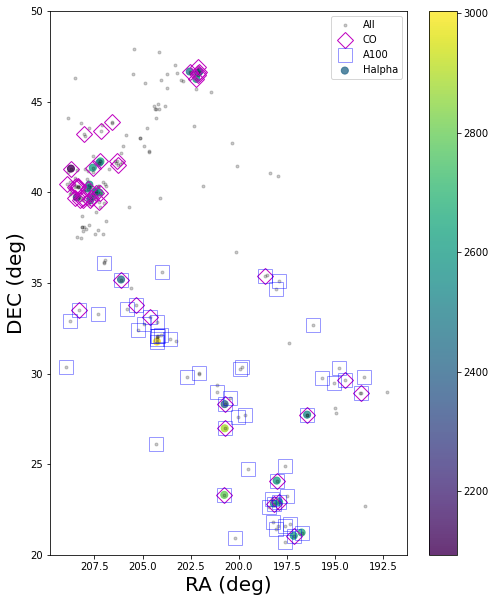

In [33]:
plt.figure(figsize=(8,10))
plt.plot(v.main['RA'][filament],v.main['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(v.main['RA'][ngchaflag],v.main['DEC'][ngchaflag],c=v.main['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & v.main['A100flag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament.png')

# Size measure to pass into legacy survey photometry#



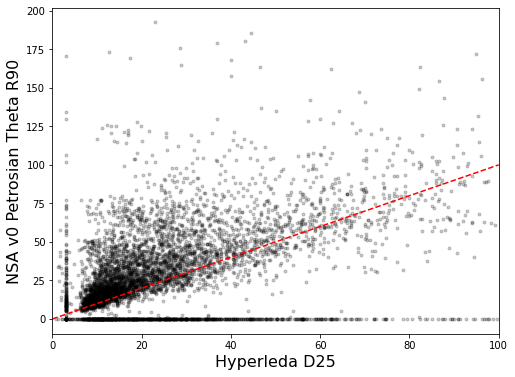

In [36]:
plt.figure(figsize=(8,6))
x = 10**(v.hl['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = v.nsav0['PETROTH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v0 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')


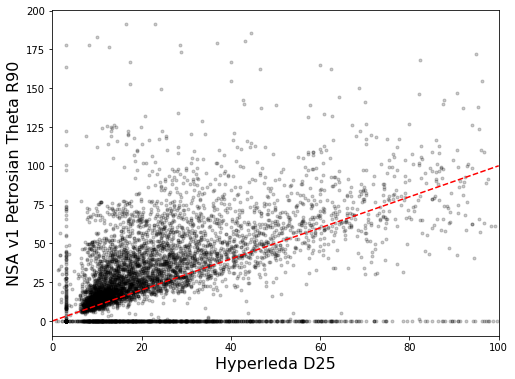

In [38]:
plt.figure(figsize=(8,6))
x = 10**(v.hl['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = v.nsav1['PETRO_TH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

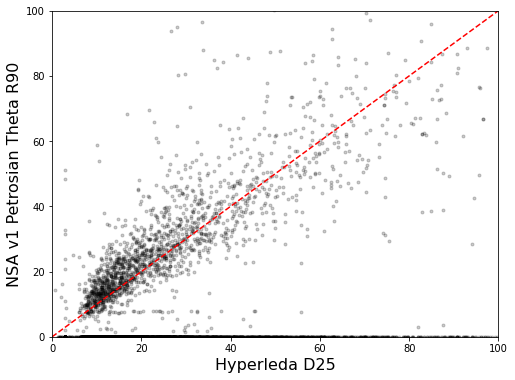

In [41]:
plt.figure(figsize=(8,6))
x = 10**(v.hl['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = v.a100['petroR90_r']*1.4
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
plt.ylim(x1,x2)
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

In [43]:
# select galaxies with a valid D25
d25_flag = v.hl['e_logd25'] != 0
no_radius_flag = ~d25_flag & ~v.main['NSAV0flag']
print(sum(no_radius_flag))

--


In [46]:
v.main.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'PGC',
 'NSAIDV1',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAV1flag',
 'NSAV0flag',
 'A100flag',
 'VFID_V1',
 'COflag',
 'HAflag',
 'HAobsflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag',
 'prefix']

In [47]:
sum(v.main['NSAV0flag'][no_radius_flag])

0

In [49]:
a100_only = v.main['A100flag'] & ~v.main['HLflag'] & ~v.main['NSAV1flag'] & ~v.main['NSAV0flag']
sum(a100_only)

9

# Displaying Cutout Images #

In [55]:
gal = 'VFID0569-NGC5989'
pointing = 'v19p002'
cutoutpath = '/home/rfinn/research/virgo-cutouts/all-cutouts-20210309/'+gal+"/"
r = fits.getdata(cutoutpath+gal+'-'+pointing+'-R.fits')
ha = fits.getdata(cutoutpath+gal+'-'+pointing+'-CS.fits')

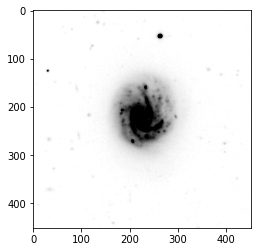

In [56]:
plt.figure()
plt.imshow(r,vmin=0,vmax=3,cmap='gray_r')

# Creating Image of the Specific SFR #

In [57]:
ssfr = ha/(.0425*r)

(150.0, 350.0, 150.0, 350.0)

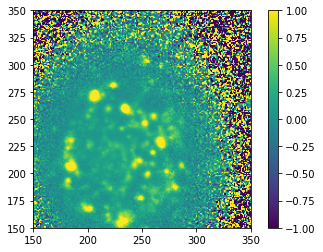

In [58]:
plt.figure()
plt.imshow(ssfr,vmin=-1,vmax=1)
plt.colorbar()
plt.axis([150,350,150,350])

Illustrate each stage of analysis

# Compare my R mag and NSA mag

In [59]:
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

/home/rfinn/github/Virgo/programs/readtablesv2.py:142: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:142: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:143: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:143: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:144: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:144: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: invalid value encountered in log10
  const =

In [60]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag,VFID_V1
bytes8,float64,float64,float64,float32,bytes30,bytes38,bool,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [61]:
v.nsav0

VFID,IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,ZLG,ZDIST,ZDIST_ERR,NSAID,NMGY [7],NMGY_IVAR [7],OK,RNMGY [7],ABSMAG [7],AMIVAR [7],EXTINCTION [7],KCORRECT [7],KCOEFF [5],MTOL [7],B300,B1000,METS,MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETROFLUX [7],PETROFLUX_IVAR [7],FIBERFLUX [7],FIBERFLUX_IVAR [7],BA50,PHI50,BA90,PHI90,SERSICFLUX [7],SERSICFLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETROTHETA,PETROTH50,PETROTH90,SERSIC_TH50,OBJNO,PLATE,FIBERID,MJD,COEFF [7],VDISP,D4000,D4000ERR,FA,FAERR,S2FLUX,S2FLUXERR,S2EW,S2EWERR,S2VMEAS,S2VMERR,S2RATIO,HAFLUX,HAFLUXERR,HAEW,HAEWERR,HAVMEAS,HAVMERR,N2FLUX,N2FLUXERR,N2EW,N2EWERR,N2VMEAS,N2VMERR,HBFLUX,HBFLUXERR,HBEW,HBEWERR,HBVMEAS,HBVMERR,O1FLUX,O1FLUXERR,O1EW,O1EWERR,O1VMEAS,O1VMERR,O2FLUX,O2FLUXERR,O2EW,O2EWERR,O2VMEAS,O2VMERR,O3FLUX,O3FLUXERR,O3EW,O3EWERR,O3VMEAS,O3VMERR,AHGEW,AHGEWERR,AHDEW,AHDEWERR,NE3EW,NE3EWERR,NE5EW,NE5EWERR,AV,S2NSAMP,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC
bytes8,bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,bytes6,bytes23,bytes8,int32,float64,float64
VFID0000,--,--,0.0,0.0,0,0,0,0,0,0,0.0,0.0,--,0.0,0,0,0,--,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,--,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,--,--,--,0,0.0,0.0
VFID0001,--,--,0.0,0.0,0,0,0,0,0,0,0.0,0.0,--,0.0,0,0,0,--,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,--,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,--,--,--,0,0.0,0.0
VFID0002,--,--,0.0,0.0,0,0,0,0,0,0,0.0,0.0,--,0.0,0,0,0,--,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


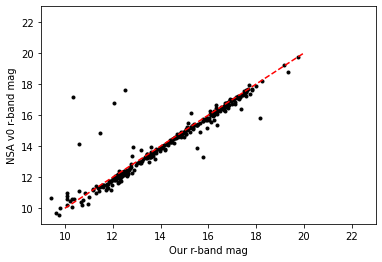

In [62]:
plt.figure()
nsamag = 22.5 - 2.5*np.log10(v.nsav0['NMGY'][:,4])
plt.plot(v.ha['GAL_MAG'],nsamag,'k.')
plt.axis([9,23,9,23])
plt.xlabel('Our r-band mag')
plt.ylabel('NSA v0 r-band mag')
xl = np.linspace(10,20,100)
plt.plot(xl,xl,'r--')

# Positions of Halpha Sources

In [63]:
def plot_spines():
    sfiles = glob.glob(homedir+'/research/Virgo/tables-north/spines/filament*.fits')
    ncolor = 0
    for i,f in enumerate(sfiles):
        spine  = Table.read(f)
        plt.plot(spine['ra'],spine['dec'],c=mycolors[ncolor],label=os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament',''),lw=3)
        ncolor += 1
        if ncolor > len(mycolors)-1:
            ncolor = 0

Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

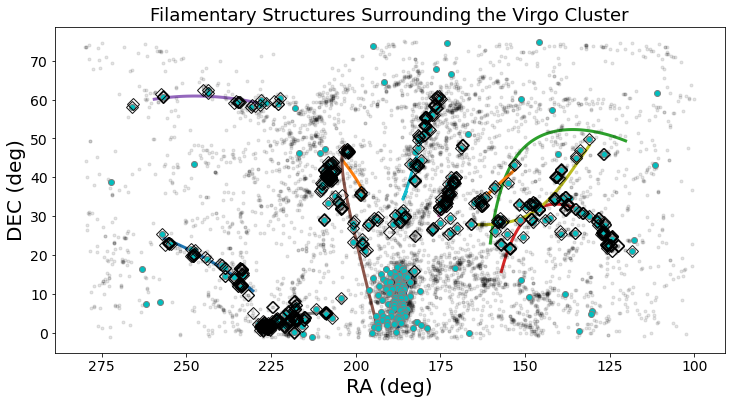

In [64]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=6,alpha=1,label='CO',mec='0.5')
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kD',alpha=.9,mfc='None',markersize=9,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


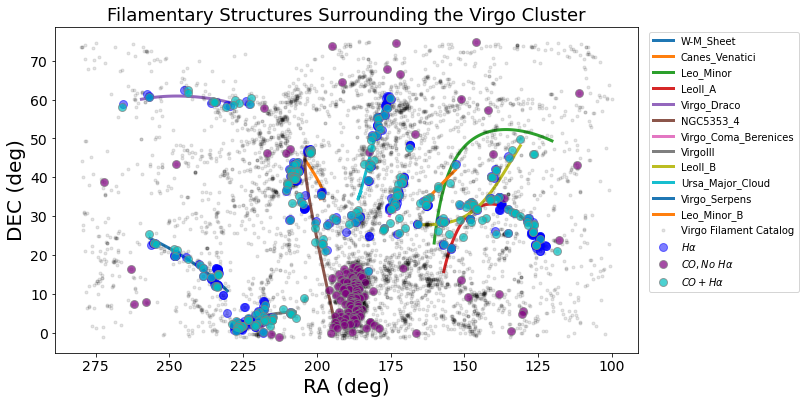

In [195]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(right=.8)
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='Virgo Filament Catalog')
# plot CO sources
flag = v.main['HAobsflag'] & ~v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',alpha=.5,label=r'$H\alpha$',markersize=8)

flag = v.main['COflag'] & ~v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',color='purple',markersize=8,alpha=.7,label=r'$CO, No \ H\alpha$',mec='0.5')
flag = v.main['COflag'] & v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=8,alpha=.7,label=r'$CO + H\alpha$',mec='0.5')

plt.legend(bbox_to_anchor=(1.01,1))
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)
plt.savefig(plotdir+'/halpha_positions.png')
plt.savefig(plotdir+'/halpha_positions.pdf')

# Calculate the Fraction of Galaxies Observed in Each Filament

In [186]:
np.sum(v.paper1['COflag'])

242

In [187]:
# something is not right here - need to update
all_filaments = set(v.env['filament'])
#for f in virgoCommon.filaments: #these need to be renamed
for f in all_filaments:
    filmemb = (v.env['filament'] == f) & (v.env['filament_member'])
    nmemb = sum(filmemb)
    
    filmembco = filmemb & v.paper1['COflag']
    filmembcoha = filmembco & v.main['HAobsflag']
    nco = sum(filmembco)
    ncoha = sum(filmembcoha)
    frac_co_with_ha = ncoha/nco
    
    filmembha = filmemb & v.main['HAobsflag']
    nha = sum(filmembha)
    frac_filmemb_with_ha = nha/nmemb
    
    
    print('######### {}  ##########'.format(f))
    print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
    print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
    print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
    print("")
    

    

######### Coma_Berenices  ##########
Number of members=105, CO=15, Halpha=48
Percent of members with Halpha = 45.7 (48/105)
Percent of CO members with Halpha = 100.0 (15/15)

######### Serpens  ##########
Number of members=65, CO=10, Halpha=36
Percent of members with Halpha = 55.4 (36/65)
Percent of CO members with Halpha = 100.0 (10/10)

######### Bootes  ##########
Number of members=169, CO=1, Halpha=1
Percent of members with Halpha = 0.6 (1/169)
Percent of CO members with Halpha = 100.0 (1/1)

######### Leo_Minor  ##########
Number of members=124, CO=0, Halpha=1
Percent of members with Halpha = 0.8 (1/124)
Percent of CO members with Halpha = nan (0/0)

######### Draco  ##########
Number of members=48, CO=9, Halpha=16
Percent of members with Halpha = 33.3 (16/48)
Percent of CO members with Halpha = 100.0 (9/9)



/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


######### NGC5353_4  ##########
Number of members=133, CO=18, Halpha=39
Percent of members with Halpha = 29.3 (39/133)
Percent of CO members with Halpha = 100.0 (18/18)

######### Canes_Venatici  ##########
Number of members=96, CO=0, Halpha=8
Percent of members with Halpha = 8.3 (8/96)
Percent of CO members with Halpha = nan (0/0)

######### LeoII_A  ##########
Number of members=145, CO=16, Halpha=45
Percent of members with Halpha = 31.0 (45/145)
Percent of CO members with Halpha = 100.0 (16/16)

######### Ursa_Major_Cloud  ##########
Number of members=580, CO=20, Halpha=54
Percent of members with Halpha = 9.3 (54/580)
Percent of CO members with Halpha = 100.0 (20/20)

######### W-M_Sheet  ##########
Number of members=345, CO=1, Halpha=1
Percent of members with Halpha = 0.3 (1/345)
Percent of CO members with Halpha = 100.0 (1/1)

######### VirgoIII  ##########
Number of members=206, CO=36, Halpha=121
Percent of members with Halpha = 58.7 (121/206)
Percent of CO members with Halpha = 1

In [188]:
filmemb = (~v.env['filament_member'])
nmemb = sum(filmemb)
    
filmembco = filmemb & v.paper1['COflag']
filmembcoha = filmembco & v.main['HAobsflag']
nco = sum(filmembco)
ncoha = sum(filmembcoha)
frac_co_with_ha = ncoha/nco
    
filmembha = filmemb & v.main['HAobsflag']
nha = sum(filmembha)
frac_filmemb_with_ha = nha/nmemb
    
    
print('######### NON FILAMENT GALAXIES  ##########'.format(f))
print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
print("")

######### NON FILAMENT GALAXIES  ##########
Number of members=4662, CO=93, Halpha=257
Percent of members with Halpha = 5.5 (257/4662)
Percent of CO members with Halpha = 100.0 (93/93)



In [190]:
print(sum( v.env['filament_member']))
print(sum(v.main['COflag'] & v.env['filament_member']))
print(sum(v.main['COflag'] & v.env['filament_member'] & v.main['HAobsflag']))
print(sum(v.main['COflag'] & ~v.env['filament_member'] & v.main['HAobsflag']))
print(sum(v.env['filament_member'] & v.main['HAobsflag']))

2118
166
150
93
408


# Halpha Targets in z0MGS

In [73]:
print(sum(v.main['HAobsflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] &v.main['COflag'] ))
print(sum(v.main['HAobsflag']  &v.main['COflag'] ))

665
337
237
243


# Compare SFR z0MGS with our SFR

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ks" (-> marker='s'). The keyword argument will take precedence.
  if __name__ == '__main__':


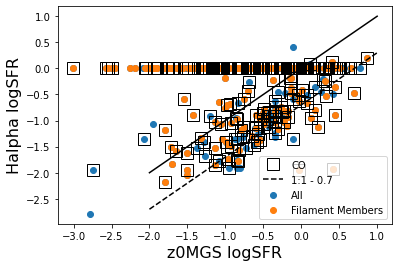

In [74]:
x = v.z0mgs['logsfr']
y = v.ha['LOG_SFR_HA']
flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-2,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.7,'k--',label='1:1 - 0.7')
plt.xlabel('z0MGS logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()


In [75]:
def get_BV_MS(logMstar):
    ''' get MS fit that BV calculated from GSWLC '''
    return 0.53*logMstar-5.5

def plot_BV_MS(ax,color='mediumblue',ls='-'):
    plt.sca(ax)
    
    x1,x2 = 8.5,11.15
    xline = np.linspace(x1,x2,100)
    yline = get_BV_MS(xline)
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c=color,ls=ls,lw=3,label='Linear Fit')

    # scatter around MS fit
    sigma=0.3
    ax.plot(xline,yline-1.5*sigma,c='w',ls='--',lw=4)
    ax.plot(xline,yline-1.5*sigma,c=color,ls='--',lw=3,label='fit-1.5$\sigma$')

def plot_GSWLC_sssfr(ax=None,ls='-'):
    if ax is None:
        ax = plt.gca()

    ssfr = -11.5
    x1,x2 = 9.6,11.15
    xline = np.linspace(x1,x2,100)
    yline = ssfr+xline
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c='0.5',ls=ls,lw=3,label='log(sSFR)=-11.5')
    

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ks" (-> marker='s'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


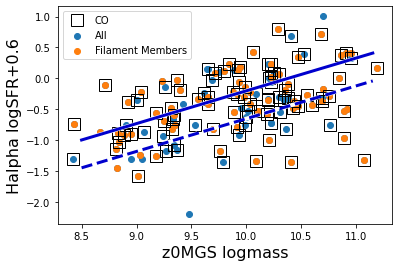

In [76]:
# SF MS
x = v.z0mgs['logmass']
y = v.ha['LOG_SFR_HA']+.6
flag = v.main['HAobsflag'] & (v.ha['GAL_HF_TOT'] > 0)
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
#xline = np.linspace(8,11,100)
#plt.plot(xline,xline,'k-')
#plt.plot(xline,xline-.5,'k--',label='1:1 - 0.5')
plt.xlabel('z0MGS logmass',fontsize=16)
plt.ylabel('Halpha logSFR+0.6',fontsize=16)
plt.legend()
plot_BV_MS(plt.gca())



# Morphologies

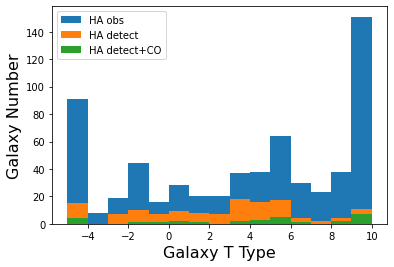

In [77]:
plt.figure()

x = v.hl['t']

# plot histogram of T type, with and without z0mgs
mybins = np.arange(-5,11)
flag1 = v.main['HAobsflag'] #& ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA obs')
flag1 = v.main['HAobsflag']  & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect')
flag1 = v.main['HAobsflag'] & ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect+CO')
plt.xlabel('Galaxy T Type',fontsize=16)
plt.ylabel('Galaxy Number',fontsize=16)
plt.legend()

# SFR vs Stellar Mass for all Galaxies vs Halpha Sample



In [78]:
v.magphys.colnames

['VFID',
 'logSFR',
 'logSFR-med',
 'logSFR-68conf',
 'logMstar',
 'logMstar-med',
 'logMstar-68conf',
 'logsSFR',
 'logsSFR-med',
 'logsSFR-68conf',
 'chisq',
 'magphysFlag',
 'logSFR-legacyExt',
 'logSFR-med-legacyExt',
 'logSFR-68conf-legacyExt',
 'logMstar-legacyExt',
 'logMstar-med-legacyExt',
 'logMstar-68conf-legacyExt',
 'logsSFR-legacyExt',
 'logsSFR-med-legacyExt',
 'logsSFR-68conf-legacyExt',
 'chisq-legacyExt',
 'logSFR-salimExt',
 'logSFR-med-salimExt',
 'logSFR-68conf-salimExt',
 'logMstar-salimExt',
 'logMstar-med-salimExt',
 'logMstar-68conf-salimExt',
 'logsSFR-salimExt',
 'logsSFR-med-salimExt',
 'logsSFR-68conf-salimExt',
 'chisq-salimExt']

In [79]:
v.main.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'PGC',
 'NSAIDV1',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAV1flag',
 'NSAV0flag',
 'A100flag',
 'VFID_V1',
 'COflag',
 'HAflag',
 'HAobsflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag',
 'prefix']

In [ ]:
83/149


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


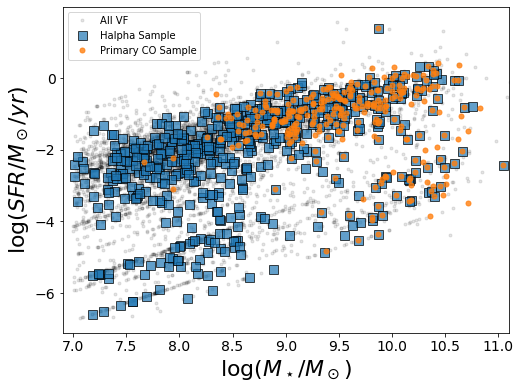

In [191]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.main['HAobsflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.main['HAobsflag']
flag3 = flag1 & v.main['COflag']
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag2],y[flag2],'bs',c=mycolors[0],mec='k',alpha=.7,label='Halpha Sample',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)
plt.savefig(plotdir+'sfr-mstar-halpha.png')
plt.savefig(plotdir+'sfr-mstar-halpha.pdf')

In [86]:
mycolors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

# Size of SF Disk vs Stellar Disk



In [149]:
v.ha.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'NEDname',
 'prefix',
 'HAflag',
 'REDSHIFT',
 'ZDIST',
 'GAL_RA',
 'GAL_DEC',
 'ELLIP_RA',
 'ELLIP_DEC',
 'FILT_COR',
 'R_FWHM',
 'H_FWHM',
 'POINTING',
 'BBOX',
 'FILTER_RATIO',
 'GAL_XC',
 'GAL_XC_ERR',
 'GAL_YC',
 'GAL_YC_ERR',
 'GAL_MAG',
 'GAL_MAG_ERR',
 'GAL_RE',
 'GAL_RE_ERR',
 'GAL_N',
 'GAL_N_ERR',
 'GAL_BA',
 'GAL_BA_ERR',
 'GAL_PA',
 'GAL_PA_ERR',
 'GAL_SKY',
 'GAL_CHISQ',
 'GAL_SERSASYM',
 'GAL_SERSASYM_ERR',
 'GAL_SERSASYM_ERROR',
 'GAL_SERSASYM_CHISQ',
 'GAL_SERSASYM_RA',
 'GAL_SERSASYM_DEC',
 'ELLIP_XCENTROID',
 'ELLIP_YCENTROID',
 'ELLIP_EPS',
 'ELLIP_THETA',
 'ELLIP_GINI',
 'ELLIP_GINI2',
 'ELLIP_AREA',
 'ELLIP_SUM',
 'ELLIP_SUM_MAG',
 'ELLIP_ASYM',
 'ELLIP_ASYM_ERR',
 'ELLIP_HSUM',
 'ELLIP_HSUM_MAG',
 'ELLIP_HASYM',
 'ELLIP_HASYM_ERR',
 'R_SKYNOISE',
 'H_SKYNOISE',
 'GAL_R24',
 'GAL_R24_ERR',
 'GAL_R25',
 'GAL_R25_ERR',
 'GAL_R26',
 'GAL_R26_ERR',
 'GAL_R_F25',
 'GAL_R_F25_ERR',
 'GAL_R24V',
 'GAL_R24V_ERR',
 'GAL_R25V',
 'G

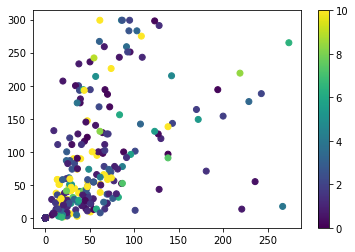

In [148]:
plt.figure()
x = v.ha['GAL_PETRO_R90']
rad = 'GAL_HPETRO_R90'
y = v.ha[]
c = v.env['n5th_2D']
plt.scatter(x,y,c=c,vmin=0,vmax=10)
plt.colorbar()

In [144]:
min(v.env['n5th_2D'])

-1000.0

In [145]:
max(v.env['n5th_2D'])

491.6613197209299

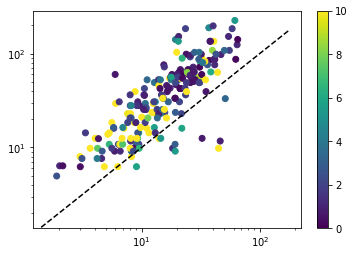

In [166]:
plt.figure()
flag = v.main['HAobsflag']
x = v.nsav0['SERSIC_TH50']
rad = 'GAL_RE'
y = v.ha[rad]*.4
y = v.ha['R24']
c = v.env['n5th_2D']
plt.scatter(x[flag],y[flag],c=c[flag],vmin=0,vmax=10)
plt.colorbar()
#plt.axis([0,175,0,175])
xline = np.linspace(0,175,100)
plt.plot(xline,xline,'k--')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

In [167]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag,VFID_V1
bytes8,float64,float64,float64,float32,bytes30,bytes38,bool,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

# looking at list of VFIDs from coadded images

In [21]:
!scp draco:research/Virgo/tables-north/v2/vf_v2_halpha_obs.fits ~/research/Virgo/tables-north/v2/.

vf_v2_halpha_obs.fits                         100%  889KB   7.2MB/s   00:00    


In [22]:
%run ~/github/Virgo/programs/readtablesv2.py

/Users/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:147: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:147: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:148: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:148: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/Users/rfinn/github/Virgo/programs/readtablesv2.py:150: RuntimeWarning: invalid value encountered in log10
  

In [23]:
np.sum(v.haobs['HaObsFlag'])

619

In [17]:
np.sum(v.paper1['COflag'])



242

In [40]:
v.main['VFID'][(v.paper1['COflag'] & ~v.haobs['HaObsFlag'])]

VFID0956
VFID1009
VFID1035
VFID5905
VFID6025
VFID6048
VFID6110
VFID6115
VFID6380
VFID6408
VFID6409


In [25]:
nohaflag = v.paper1['COflag']  & ~v.haobs['HaObsFlag']
print('number of CO sources w/out halpha = ',np.sum(nohaflag))

cohaflag = v.paper1['COflag']  & v.haobs['HaObsFlag']
print('number of CO sources w/halpha = ',np.sum(cohaflag))

number of CO sources w/out halpha =  12
number of CO sources w/halpha =  230


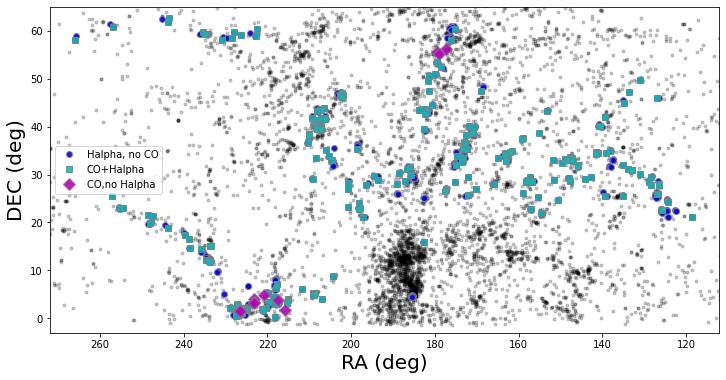

In [97]:
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)
plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.legend()

In [26]:
mosaic_centers = [(217.47004045301, 3.4214593967644 ),
(222.72913181465, 2.7345640175569 ),
(223.13184736148, 3.6234238130428 ),
(225.20704416283, 1.9044058457402 ),
(225.73783713095, 0.8310807818246 ),
(226.67637236951, 1.7576779842495 ),
(227.79885197738, 1.7050183823229) ]
morderbyra = [7,6,5,2,4,1,3]
mosaic_names = [f"NGC5846-0{i}" for i in morderbyra]
mosaic_names

['NGC5846-07',
 'NGC5846-06',
 'NGC5846-05',
 'NGC5846-02',
 'NGC5846-04',
 'NGC5846-01',
 'NGC5846-03']

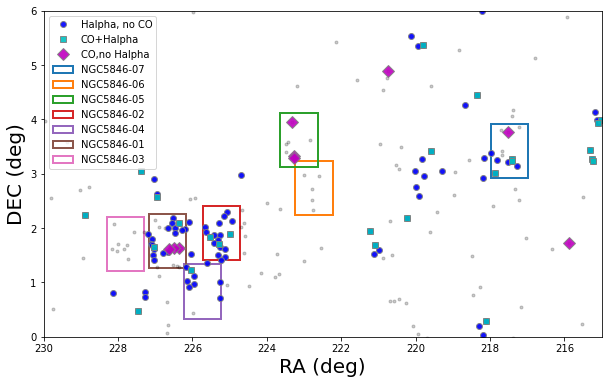

In [32]:
plt.figure(figsize=(10,6))

plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)
plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)


for i,m in enumerate(mosaic_names):
    # add a rectangle for Blanco DD time, spring 2021
    rect = Rectangle((mosaic_centers[i][0]-0.5,mosaic_centers[i][1]-0.5), 1, 1, fc="none",ec=mycolors[i],lw=2,label=m)
    plt.gca().add_artist(rect)
  
plt.axis([215,230,0,6])
plt.gca().invert_xaxis()
plt.legend()



In [28]:
mycolors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [60]:
nohaflag2 = v.paper1['COflag'] & ~v.main['HAobsflag']
print(np.sum(nohaflag2))

0


In [105]:
v.main['prefix','RA','DEC','VFID_V1'][nohaflag]

prefix,RA,DEC,VFID_V1
bytes36,float64,float64,bytes8
VFID0956-NGC3898,177.313767,56.0843617,VFID0957
VFID1009-NGC3998,179.4839445,55.4535728,VFID1010
VFID1035-NGC3982,179.1171885,55.1252607,VFID1036
VFID5905-IC1048,220.74156,4.8896824,VFID5922
VFID6025-NGC5770,223.3126245,3.9597557,VFID6042
VFID6048-IC1022,217.50768,3.7728979,VFID6065
VFID6110-IC1067,223.2718215,3.3317578,VFID6127
VFID6115-IC1066,223.2619035,3.2960214,VFID6132
VFID6380-UGC09215,215.8630875,1.7262628,VFID6397


In [104]:
v.main['VFID_V1'][nohaflag]

VFID0957
VFID1010
VFID1036
VFID5922
VFID6042
VFID6065
VFID6127
VFID6132
VFID6397
VFID6425
VFID6426


In [ ]:
flag = v/main['VFID_V1'] == 'VFID592'